Steg 1:
Det vi har börjat med är att vi har importerat CSV-filen i VS Code och sedan läst in filen med pandas.read_csv och eftersom filen är semikolon sepererad så har vi använt sep=";" Vi kan se att det finns 10 000 rader i varje kolumn, 10 kolumner och inga nollvärden etc. (Vi får finslipa texterna, detta är bara liten start)

In [6]:
import pandas as pd
df = pd.read_csv("car_price_dataset.csv", sep=";")
print(df.head()) #visar de första raderna i datan
print(df.shape)  #kollar storlek på rader och kolumner
print(df.info()) # kontrollerar kolumner och datatyper

        Brand   Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia     Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet  Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes     GLA  2020          4.2    Diesel       Automatic   231440   
3        Audi      Q5  2023          2.0  Electric          Manual   160971   
4  Volkswagen    Golf  2003          2.6    Hybrid  Semi-Automatic   286618   

   Doors  Owner_Count  Price  
0      3            5   8501  
1      2            3  12092  
2      4            2  11171  
3      2            1  11780  
4      3            3   2867  
(10000, 10)
<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  str    
 1   Model         10000 non-null  str    
 2   Year          10000 non-null  int64  
 3   Engine_Siz

Genomsnittligt pris per årsmodell

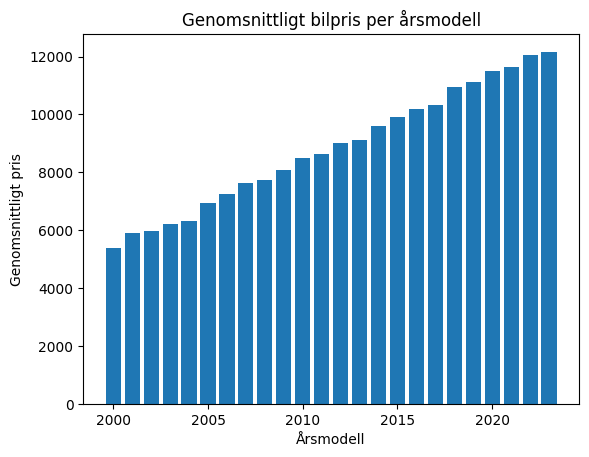

In [ ]:
import matplotlib.pyplot as plt

avg_price_per_year = df.groupby("Year")["Price"].mean()

plt.figure()
plt.bar(avg_price_per_year.index, avg_price_per_year.values)
plt.xlabel("Årsmodell")
plt.ylabel("Genomsnittligt pris")
plt.title("Genomsnittligt bilpris per årsmodell")
plt.show()

Steg 2: För att lyckas förutsäga bilpriserna har vi valt att dela upp datan i tränings, validering och testdata, uppdelningen är 60% träning, 20% validering och 20% test.

In [15]:
from sklearn.model_selection import train_test_split


y = df["Price"] #Detta är våran målvariabel
X = df.drop(columns="Price") #Här är alla kolumner förutom Price

# 60% blir träningsdata, 20% val, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.40, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42
)

print(f"Train: {X_train.shape} | Val: {X_val.shape} | Test: {X_test.shape}")

Train: (6000, 9) | Val: (2000, 9) | Test: (2000, 9)
